In [245]:
#Key Changes: Remove Outliers, mULTICOLLEAnirity treatment, Log convert of target, Grid Search GBM, Loop in final gbm for best score

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


import datetime
from datetime import timedelta
import numpy as np
import gc 
gc.collect()
import plotly_express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore')
import os

pd.set_option('display.max_columns', 100)




In [246]:
#Download data
os.chdir('/local/home/rvshnkr/kaggle_data/Home_Credit/')
#columns_desc=pd.read_csv('HomeCredit_columns_description.csv',encoding = 'unicode_escape')
# import os
#Uncomment Below lines to download data from Kaggle and Unzip it in Directory
# os.environ['KAGGLE_USERNAME'] = "raviYYYYXXX" 
# os.environ['KAGGLE_KEY'] = "XXXXXX"
# !kaggle competitions download -c home-credit-default-risk 
# !unzip "*.zip"

In [247]:
os.chdir('/local/home/rvshnkr/kaggle_data/Home_Credit/')
train=pd.read_csv('application_train.csv')
test=pd.read_csv('application_test.csv')
display(train.shape,train.head(2),test.shape,test.head(2))

(307511, 122)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(48744, 121)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,...,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


# Outline of Analysis

## Profiling of input datasets for histogram, correlations, Missing Values etc
## Uni-Variate Analysis of individual Features(Top Correlated Variables with Target and patterns)
## Identify/Impute/Remove Outliers based on EyeBalling/IQR
## Manual Feature Engineering by interaction effects, Buckets. 
## Automated Feature engineering by Featuretools based on Customer credit behaviour(Probably RFM clusters)
## Feature Selection techniques to prevent overfitting(Lasso, PCA, Correlation, SVM)
## Baseline models and comparison with default Hyperparameters(Logistic,RF, XGBoost and Light GBM)
## Hyperparameter Tuning/Cross Validation Strategy(Random Search, Grid Search, HyperOpt)
## AutoML(TPOT)/ Ensemble Models and metric analysis
## Additional Features using 360 degree view of customer and improvement in evaluation metrics by Cross-Validation 

In [248]:
train[1:100].to_csv('/local/home/rvshnkr/home_credit_default/data/train_sample.csv')
test[1:100].to_csv('/local/home/rvshnkr/home_credit_default/test_sample.csv')
#columns_desc.to_csv('data/columns_desc.csv')

In [249]:
#For Profiling of DataSet to check for missing values, correlations, Histogram, Distributions etc

In [250]:
#Uncomment Below code for One Time Data-Profiling
# import pandas_profiling

# sample_length=min(len(train),10000)
# sample_dataset=train.sample(n=sample_length)

# profile = sample_dataset.profile_report(
# check_correlation_pearson= False, 
# correlations={'pearson': False,
# 'spearman': False,
# 'kendall': False,
# 'phi_k': False,
# 'cramers': False,
# 'recoded':False},title='Raw Data Exploration')
# profile.to_file(output_file="data/train_data.html")

In [251]:
#Correlation of Individual Variables with Target
corrmat = train.corr()
df=pd.DataFrame(corrmat['TARGET']).reset_index()
df.columns=['Feature','Correl']
df=df[df['Feature']!='TARGET']

display('Top Positive Correlated Features with Target',df.sort_values(by='Correl',ascending=False).head(10),
       'Top Negative Correlated Features with Target',df.sort_values(by='Correl',ascending=False).tail(5))

'Top Positive Correlated Features with Target'

,Feature,Correl
8,DAYS_BIRTH,0.078239
21,REGION_RATING_CLIENT_W_CITY,0.060893
20,REGION_RATING_CLIENT,0.058899
79,DAYS_LAST_PHONE_CHANGE,0.055218
11,DAYS_ID_PUBLISH,0.051457
27,REG_CITY_NOT_WORK_CITY,0.050994
14,FLAG_EMP_PHONE,0.045982
26,REG_CITY_NOT_LIVE_CITY,0.044395
81,FLAG_DOCUMENT_3,0.044346
10,DAYS_REGISTRATION,0.041975


'Top Negative Correlated Features with Target'

,Feature,Correl
39,FLOORSMAX_AVG,-0.044003
9,DAYS_EMPLOYED,-0.044932
29,EXT_SOURCE_1,-0.155317
30,EXT_SOURCE_2,-0.160472
31,EXT_SOURCE_3,-0.178919


__Important factors which are affecting loan repayment__

Read more about the features definitions at https://github.com/ravi07bec/home_credit_default/blob/master/data/columns_desc.csv

a. Age of Borrower

b. City of Borrower and city's past Default rate

c. Whether the client has changed Phone before taking Loan

d. Whether the client has changed Identity document before loan

e. Whether the employee lives in a High-Rise Building or not

f. Time spent with current employer or whether they have provided Work-Phone Number

g. Normalized scores from external agencies(Probably like CIBIL score in India)

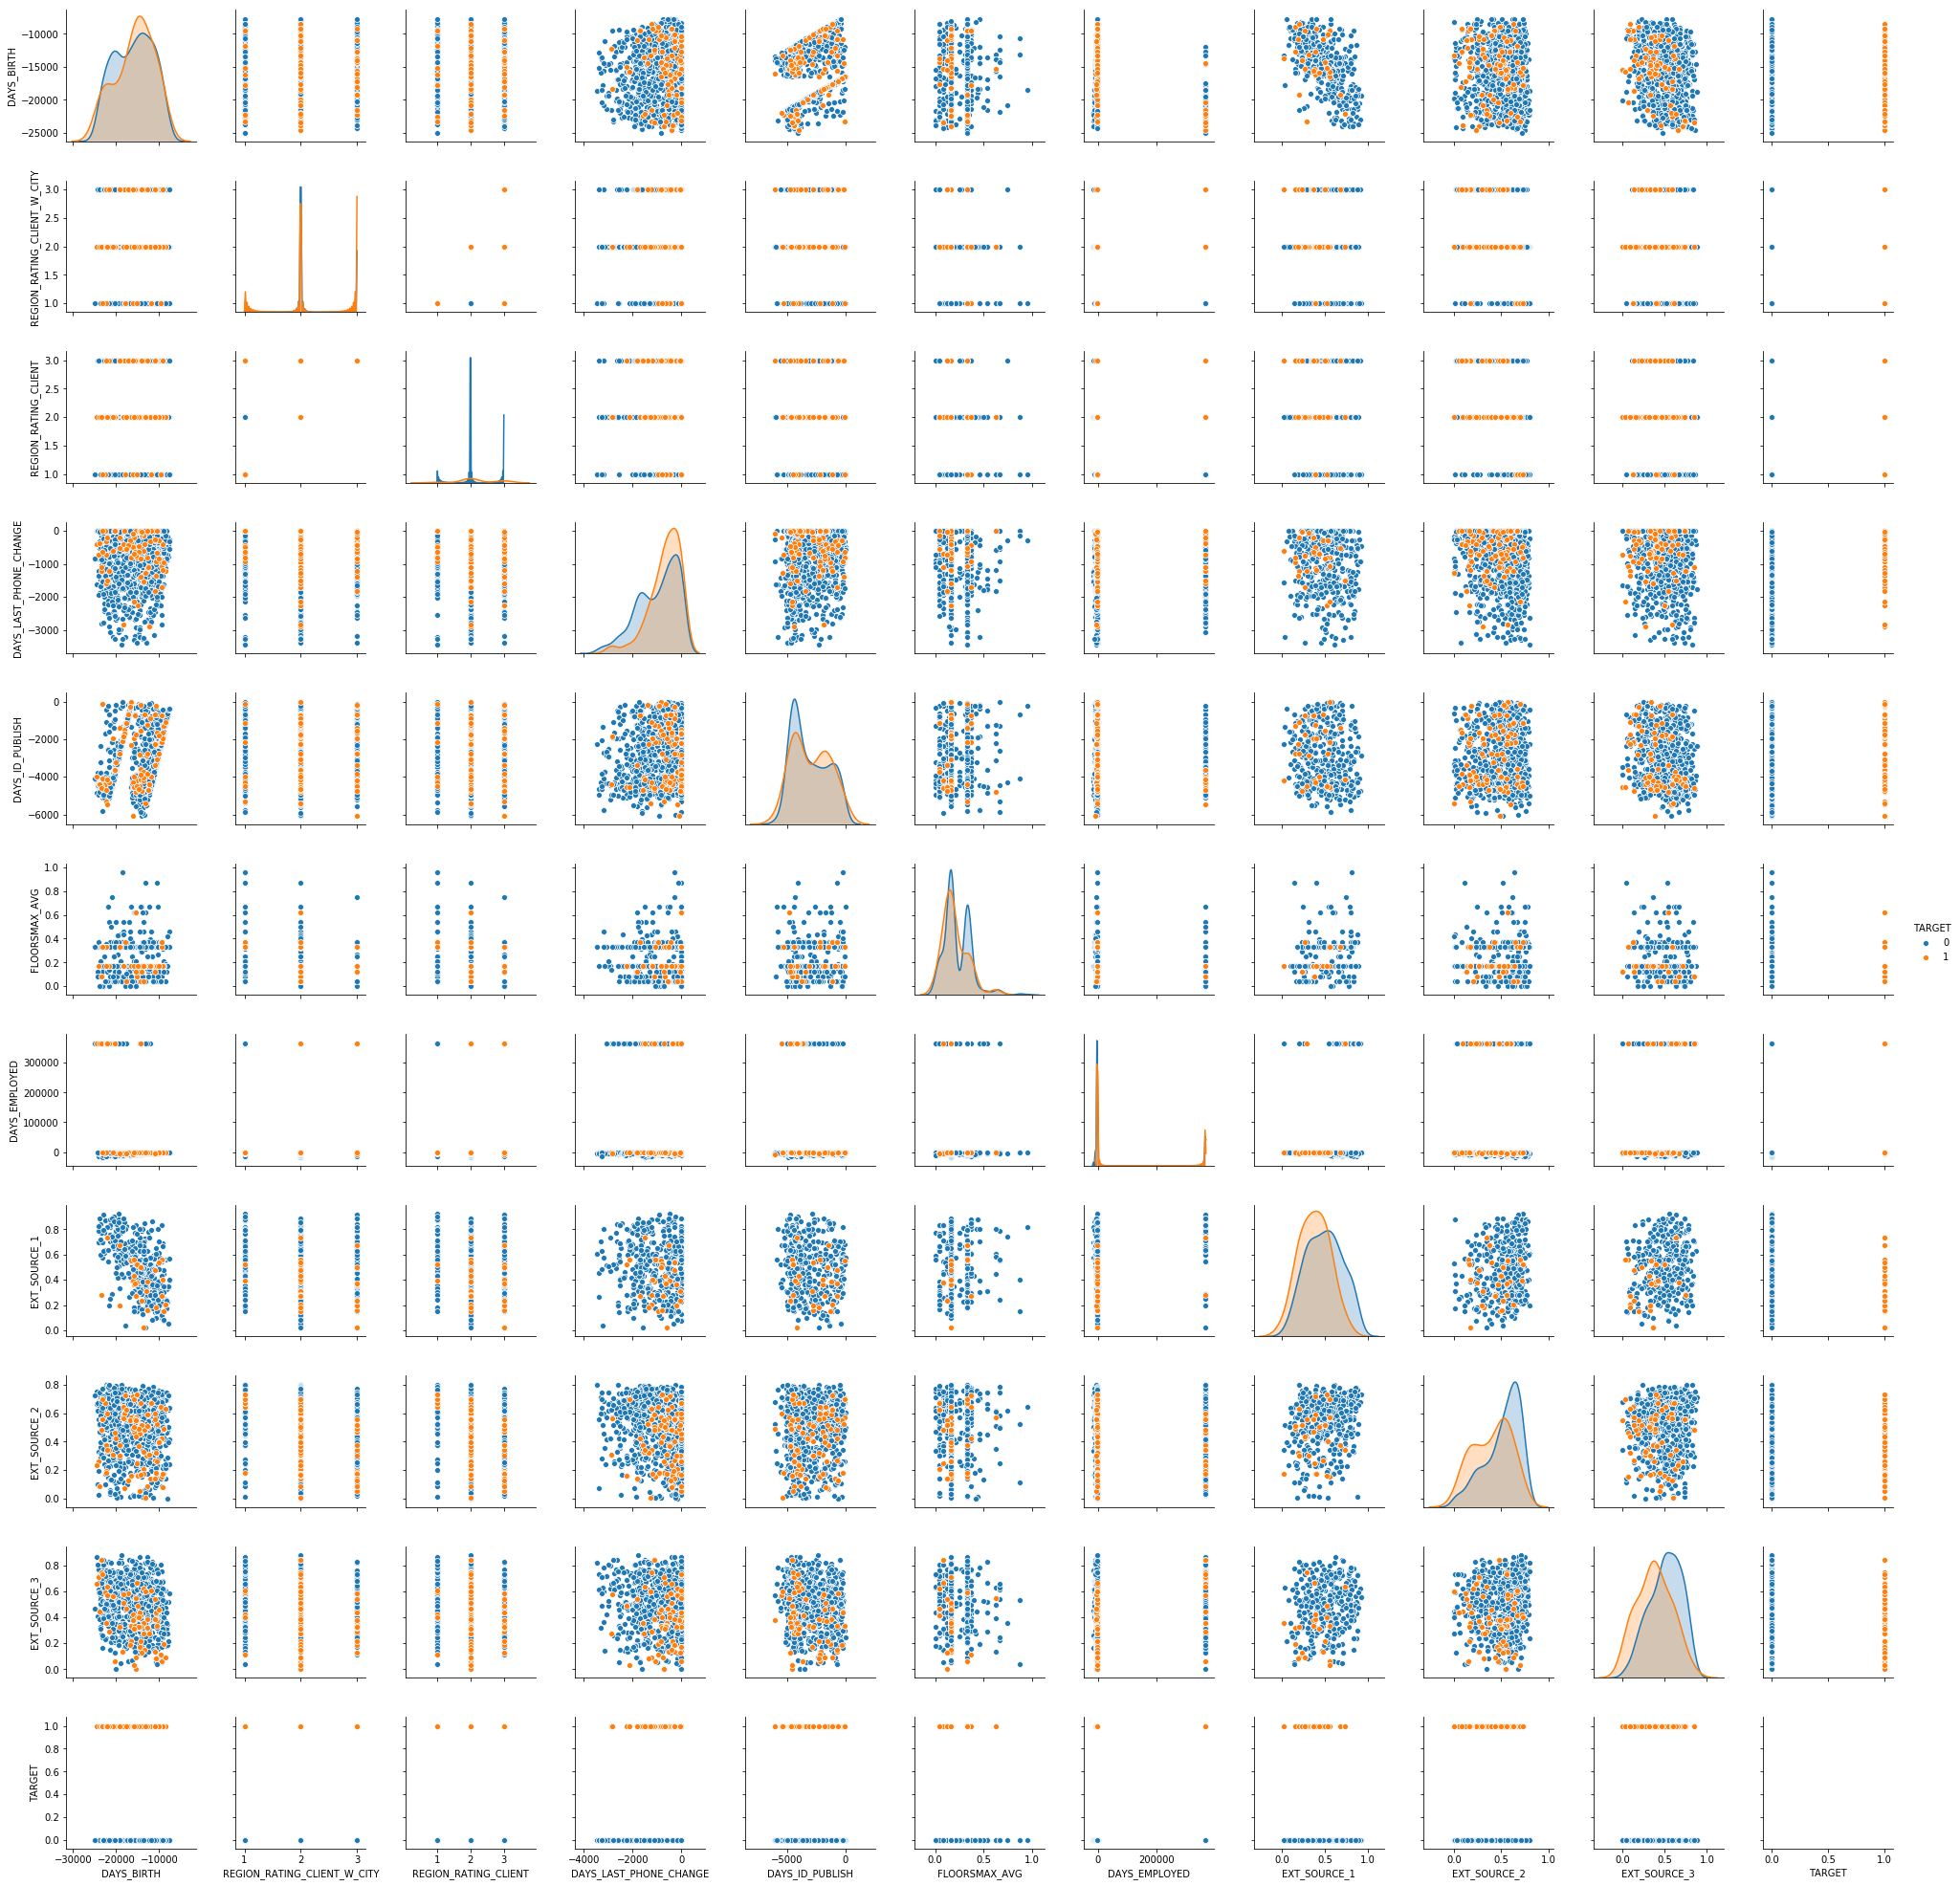

In [252]:
#PairPlot to identify the directional Movement of Highly Correlated Variables
top_correl=df.sort_values(by='Correl',ascending=False).head(5).append(df.sort_values(by='Correl',ascending=False).tail(5))
top_correl=top_correl['Feature'].values.tolist()
top_correl.append('TARGET')
subset=train[top_correl].sample(n=1000)
sns.pairplot(subset,hue="TARGET")

On seeing pairplot above, Lower age people default more(Since Negative sign),Those who have changed phone or ID recently default more, Small Heighted Building folks default higher &Lower ratings by EXT_1,Ext_2 and Ext_3 default more


__Rings a Bell ? :)__

In [ ]:
#Bucketize All the columns with Days to Year with 10 Buckets(Equidistant-Bins based on Quantiles)
import fnmatch
days_columns=train.columns
pattern = '*DAYS*'
matching = fnmatch.filter(days_columns, pattern)
print('Creating Columns and Buckets: ')
for i in matching:
    col=i.replace("DAYS", "Year")
    train[col]=train[i]/(-365)
    col2=col.replace("Year", "Bucket_Years_Start")
    train[col2]=pd.cut(train[col],bins=10,precision=0)
    train[col2]=train[col2].apply(lambda x:x.left)
    train[col2]=train[col2].astype(float)
    print(col2)
train.head(2)

Creating Columns and Buckets: 
Bucket_Years_Start_BIRTH
Bucket_Years_Start_EMPLOYED
Bucket_Years_Start_REGISTRATION
Bucket_Years_Start_ID_PUBLISH
Bucket_Years_Start_LAST_PHONE_CHANGE


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Year_BIRTH,Bucket_Years_Start_BIRTH,Year_EMPLOYED,Bucket_Years_Start_EMPLOYED,Year_REGISTRATION,Bucket_Years_Start_REGISTRATION,Year_ID_PUBLISH,Bucket_Years_Start_ID_PUBLISH,Year_LAST_PHONE_CHANGE,Bucket_Years_Start_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,25.0,1.745205,-56.0,9.994521,7.0,5.808219,4.0,3.106849,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,45.0,3.254795,-56.0,3.249315,-0.1,0.797260,-0.0,2.268493,1.0


Text(0.5, 1.0, 'Months Since Last ID Changed')

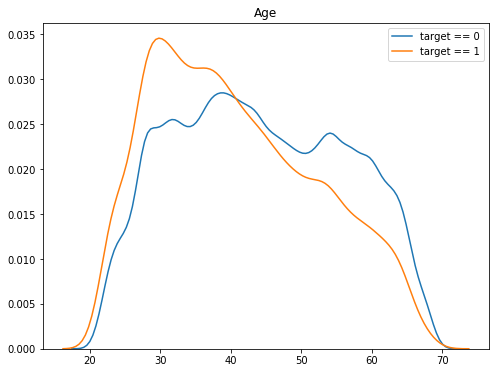

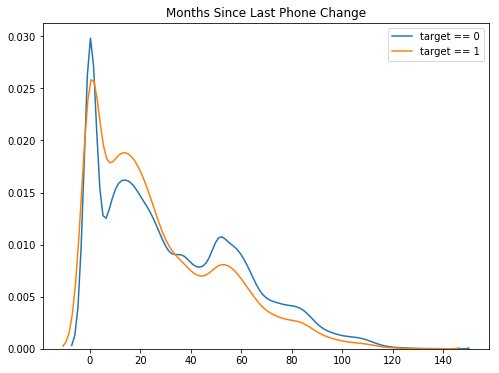

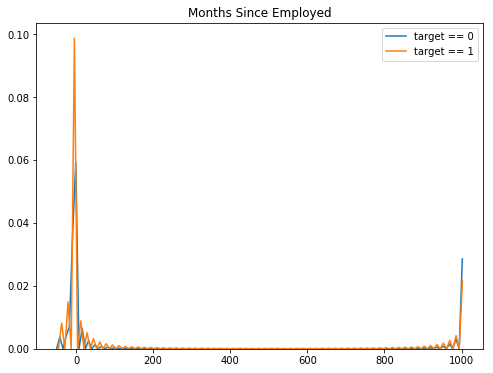

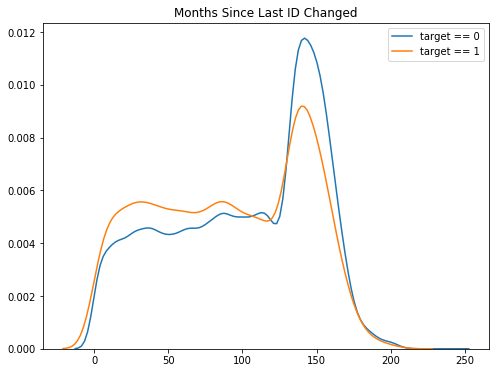

In [ ]:
#Few Plots to identify the impact of Time-Years and Months in Default
plt.figure(figsize = (8, 6))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1').set_title('Age')

plt.figure(figsize = (8, 6))
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_LAST_PHONE_CHANGE'] / -30, label = 'target == 0')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_LAST_PHONE_CHANGE'] / -30, label = 'target == 1').set_title('Months Since Last Phone Change')

plt.figure(figsize = (8, 6))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_EMPLOYED'] /365, label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_EMPLOYED'] /365, label = 'target == 1').set_title('Months Since Employed')

plt.figure(figsize = (8, 6))
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_ID_PUBLISH'] / -30, label = 'target == 0')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_ID_PUBLISH'] / -30, label = 'target == 1').set_title('Months Since Last ID Changed')



As seen above, Younger people 28-30 years old default more,Those who changed their phones in last 2 years default more and those who have changed their ID Cards in last 3-4 years have higher default probability

In [ ]:
#Identify Columns with Missing Values and Delete those columns with >10% Missing 
#train['TARGET']=train['TARGET'].astype('str')
cutoff=0.25

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data=pd.DataFrame(missing_data.reset_index())
display('Missing Data Columns',missing_data.head(5))

missing=missing_data[missing_data['Percent']>cutoff]
cols=missing['index'].values.tolist()
train=train.drop(cols,axis=1)
print('Shape of New Data',train.shape)



'Missing Data Columns'

,index,Total,Percent
0,COMMONAREA_AVG,214865,0.698723
1,COMMONAREA_MEDI,214865,0.698723
2,COMMONAREA_MODE,214865,0.698723
3,NONLIVINGAPARTMENTS_MEDI,213514,0.694330
4,NONLIVINGAPARTMENTS_MODE,213514,0.694330


Shape of New Data (307511, 82)


# Feature Engineering(Univariate Analysis)

In [ ]:
#Null Value Imputation

#Numeric Columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
from sklearn.preprocessing import Imputer

train_numeric = train.select_dtypes(include=numerics)
values = train_numeric.values
imputer = Imputer(strategy='median')
transformed_values = imputer.fit_transform(values)

numeric_df=pd.DataFrame(transformed_values)
cols=train_numeric.columns.tolist()
numeric_df.columns=cols

#String Columns
string = ['object','bool']
train_string = train.select_dtypes(include=string)

train=pd.concat([numeric_df,train_string], axis=1)

In [ ]:
train.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Year_BIRTH,Bucket_Years_Start_BIRTH,Year_EMPLOYED,Bucket_Years_Start_EMPLOYED,Year_REGISTRATION,Bucket_Years_Start_REGISTRATION,Year_ID_PUBLISH,Bucket_Years_Start_ID_PUBLISH,Year_LAST_PHONE_CHANGE,Bucket_Years_Start_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,25.0,1.745205,-56.0,9.994521,7.0,5.808219,4.0,3.106849,2.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,45.0,3.254795,-56.0,3.249315,-0.1,0.797260,-0.0,2.268493,1.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School


In [ ]:
#Select only Most Important Columns using Support Vector
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# #train=combined
# X=numeric_df
# y=target
# lsvc = LinearSVC(penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X)
# X_selected_df = pd.DataFrame(X_new, columns=[X.columns[i] for i in range(len(X.columns)) if model.get_support()[i]])
# X_selected_df=X_selected_df.reset_index()
# train2=X_selected_df
# train=pd.concat([train2,train_string], axis=1)

# display(train.shape,train.head(2))

In [ ]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

num_cols = get_cols_with_no_nans(train , 'num')
cat_cols = get_cols_with_no_nans(train , 'no_num')

def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    
print('There were {} columns before encoding categorical features'.format(train.shape[1]))
train = oneHotEncode(train, cat_cols)
print('There are {} columns after encoding categorical features'.format(train.shape[1]))

target=train.TARGET
train=train.drop('TARGET',axis=1)
target=target.astype('str')   
train.head(2)

There were 82 columns before encoding categorical features
There are 171 columns after encoding categorical features


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,...,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

from xgboost import XGBClassifier
from sklearn import preprocessing 

#For Final Check of Any Categorical Variable
for f in train.columns: 
    if train[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))


train.fillna((-999), inplace=True) 
train = train.astype(float) 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 14,shuffle=False)


model=XGBClassifier()
# Fit on training data
model.fit(X_train,y_train)
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)

from sklearn.metrics import roc_auc_score

rf_predictions=rf_predictions.astype('float')
y_test=y_test.astype('float')
# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_predictions)
print('ROC Score is:',roc_value)

y_pred=rf_predictions
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test,labels=[0,1])

display(cm)

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
matrix = confusion_matrix(y_test, rf_predictions)
print('Accuracy is :',matrix.diagonal().sum()/matrix.sum())

print('F1 score:',f1_score(y_test, y_pred, average="macro"))
print('Precision:',precision_score(y_test, y_pred, average="macro"))
print('Recall:',recall_score(y_test, y_pred, average="macro"))   

ROC Score is: 0.5031347079511124


array([[56603,  4852],
       [   16,    32]])

Accuracy is : 0.9208493894606767
F1 score: 0.48587404896438613
Precision: 0.7938572939549263
Recall: 0.5031347079511124


In [ ]:
import difflib

fi = pd.DataFrame({'feature': list(train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(10)

,feature,importance
27,EXT_SOURCE_2,0.086663
28,EXT_SOURCE_3,0.077607
87,NAME_INCOME_TYPE_Working,0.075992
89,NAME_EDUCATION_TYPE_Higher education,0.063037
35,FLAG_DOCUMENT_3,0.047040
74,CODE_GENDER_M,0.042643
5,AMT_GOODS_PRICE,0.036938
83,NAME_INCOME_TYPE_Pensioner,0.035460
7,DAYS_BIRTH,0.034963
76,FLAG_OWN_CAR_N,0.032925


In [ ]:
#For AutoML using TPOT
train1=train
target1=target
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train1, target1,
                                                    train_size=0.8, test_size=0.2)

# X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.1, random_state = 14,shuffle=False)

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2,max_time_mins=10)
pipeline_optimizer.fit(X_train, y_train)
#print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('/local/home/rvshnkr/Pricing/PRS/tpot_exported_pipeline_prs.py')
# Calculate roc auc
rf_predictions = pipeline_optimizer.predict(X_test)
rf_predictions=rf_predictions.astype('float')
y_test=y_test.astype('float')

roc_value = roc_auc_score(y_test, rf_predictions)
print(roc_value)

y_pred=rf_predictions

cm=confusion_matrix(y_pred,y_test,labels=[0,1])

display(cm)

matrix = confusion_matrix(y_test, rf_predictions)
print('Accuracy is :',matrix.diagonal().sum()/matrix.sum())

print('F1 score:',f1_score(y_test, y_pred, average="macro"))
print('Precision:',precision_score(y_test, y_pred, average="macro"))
print('Recall:',recall_score(y_test, y_pred, average="macro"))   

In [74]:
#Testing

0.5045765996243339


array([[56466,  4896],
       [   88,    53]])

Accuracy is : 0.9189633026031251
F1 score: 0.4892788852855261
Precision: 0.6480488652274226
Recall: 0.5045765996243339
